# Taller 2

## Jem Pool Suarez - 1630536

## Similaridad de documentos usando la medida del coseno

$
\begin{align}
\text { Similaridad (A, B) }
=\frac
    { \left( \sum_{i=1}^n A_i B_i \right) }
    { \sqrt{\left( \sum_{i=1}^n A^2_i  \right)} \sqrt{\left( \sum_{i=1}^n B^2_i  \right)} }
\end{align}
$

In [3]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

display(Markdown('<h3>{}</h3>'.format("Conjunto de términos-documentos y query")))

data = [[ 27,4,24,13],
        [ 3,33,0,0],
        [ 0,33,29,0],
        [ 14,0,17,22]]

rows = ('car', 'auto', 'insurance', 'best')
columns = ('Doc1', 'Doc2', 'Doc3', 'query')
display(pandas.DataFrame(data, rows, columns))
print("\n")

<h3>Conjunto de términos-documentos y query</h3>

,Doc1,Doc2,Doc3,query
car,27,4,24,13
auto,3,33,0,0
insurance,0,33,29,0
best,14,0,17,22


In [4]:
'''
Use el criterio de similaridad del coseno e implemente la función Sim(q; d) sobre los términos car (eje X) y best (eje Y) para encontrar el documento más relevante (valor mayor del coseno) y el menos relevante (menor valor del coseno) según el query.
'''
def Sim(A, B):  
    dotAB = 0; normA = 0; normB = 0;
    for index in range(len(A)):
        dotAB += A[index]*B[index]
        normA += A[index]**2 
        normB += B[index]**2           
    return dotAB / (normA**0.5 * normB**0.5)

display(Markdown('<h3>{}</h3>'.format("Implementación la función Sim(q, d) sobre los términos car y best")))
car = data[0]; best = data[3];
display(pandas.DataFrame([car, best], ('car', 'best'), columns))

Doc1 = [car[0], best[0]]; Doc2 = [car[1], best[1]]; Doc3 = [car[2], best[2]]; query = [car[3], best[3]];
print("\nSim(Doc1, query) = ", round( Sim(Doc1, query) , 4) )
print("Sim(Doc2, query) = ", round( Sim(Doc2, query) , 4) )
print("Sim(Doc3, query) = ", round( Sim(Doc3, query) , 4) ,"\n")


<h3>Implementación la función Sim(q, d) sobre los términos car y best</h3>

,Doc1,Doc2,Doc3,query
car,27,4,24,13
best,14,0,17,22



Sim(Doc1, query) =  0.8479
Sim(Doc2, query) =  0.5087
Sim(Doc3, query) =  0.9128 



<h3>Vectores de documentos y query en el plano cartesiano sobre los términos car y best</h3>

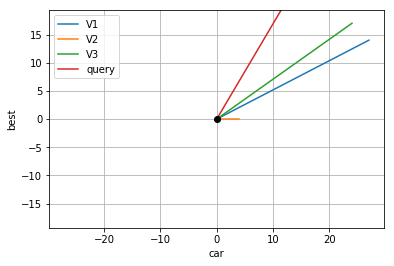

In [5]:
'''
Implementar una rutina que muestre los vectores de cada documento y el query en el plano cartesiano sobre los términos car y best.
'''

display(Markdown('<h3>{}</h3>'.format("Vectores de documentos y query en el plano cartesiano sobre los términos car y best")))

M = np.array([Doc1, Doc2, Doc3, query])

rows,cols = M.T.shape
for i,l in enumerate(range(0,cols)):
    xs = [0,M[i,0]]
    ys = [0,M[i,1]]
    plt.plot(xs,ys)
    
#Get absolute maxes for axis ranges to center origin
maxes = 1.1*np.amax(abs(M), axis = 0)

plt.plot(0,0,'ok') #<-- plot a black point at the origin
plt.axis('equal')  #<-- set the axes to the same scale
plt.xlim([-maxes[0],maxes[0]]) #<-- set the x axis limits
plt.ylim([-maxes[1],maxes[1]]) #<-- set the y axis limits
plt.legend([*['V'+str(i+1) for i in range(cols-1)],"query"]) #<-- give a legend
plt.grid(b=True, which='major') #<-- plot grid lines
plt.xlabel('car')
plt.ylabel('best')
plt.show()